In [59]:
import pydicom
import matplotlib.pylab as plt
import os
import numpy as np

In [79]:
import pydicom
import matplotlib.pylab as plt
import os
import re

subjectNumber = '002'

subject_directory = '../Test Data/CA' + subjectNumber
volume_dicoms = os.listdir(subject_directory + '/Dicom/Vol/')
sac_dicoms = os.listdir(subject_directory + '/Dicom/Sac/')

dataset_vol = [None] * (len(volume_dicoms))
for dicom in volume_dicoms:
    slice_number = int(dicom.split('Slice')[1].split('.dcm')[0])
    dataset_vol[slice_number-1] = pydicom.dcmread(subject_directory + '/Dicom/Vol/'+dicom)
dataset_vol_volumes = [None] * (len(volume_dicoms))
for i in range(0, len(dataset_vol)-2):
    volumeArray = np.zeros((dataset_vol[i].pixel_array.shape[0],dataset_vol[i].pixel_array.shape[1],3))
    volumeArray[:,:,0] = dataset_vol[i].pixel_array
    volumeArray[:,:,1] = dataset_vol[i+1].pixel_array
    volumeArray[:,:,2] = dataset_vol[i+2].pixel_array
    dataset_vol_volumes[i] = volumeArray

dataset_sac = [None] * (len(sac_dicoms))
for dicom in sac_dicoms:
    slice_number = int(dicom.split('Slice')[1].split('.dcm')[0])
    dataset_sac[slice_number-1] = pydicom.dcmread(subject_directory + '/Dicom/Sac/'+dicom)
dataset_sac_volumes = [None] * (len(sac_dicoms))
for i in range(0, len(dataset_sac)-2):
    volumeArray = np.zeros((dataset_sac[i].pixel_array.shape[0],dataset_vol[i].pixel_array.shape[1],3))
    volumeArray[:,:,0] = dataset_sac[i].pixel_array
    volumeArray[:,:,1] = dataset_sac[i+1].pixel_array
    volumeArray[:,:,2] = dataset_sac[i+2].pixel_array
    dataset_sac_volumes[i] = volumeArray

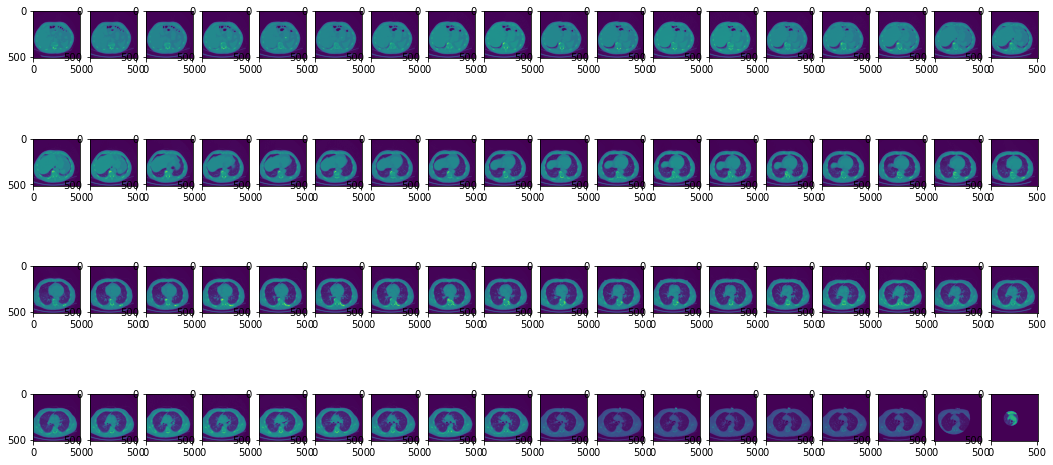

In [76]:
plt.rcParams["figure.figsize"] = [18, 9]
for i in range(1, len(dataset_vol)):
    plt.subplot(4, int(len(dataset_vol)/4), i)
    plt.imshow(dataset_vol[i].pixel_array)

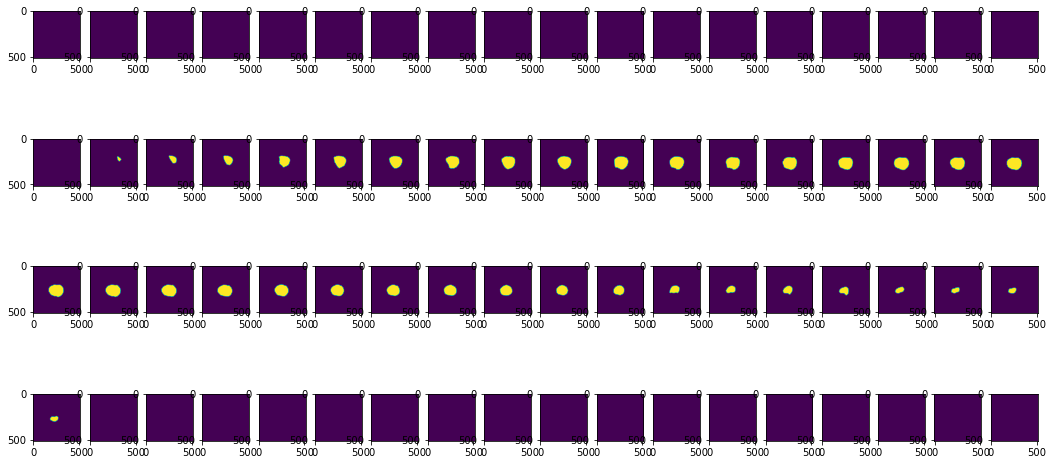

In [80]:
plt.rcParams["figure.figsize"] = [18, 9]
for i in range(1, len(dataset_sac)):
    plt.subplot(4, int(len(dataset_sac)/4), i)
    plt.imshow(dataset_sac[i].pixel_array)

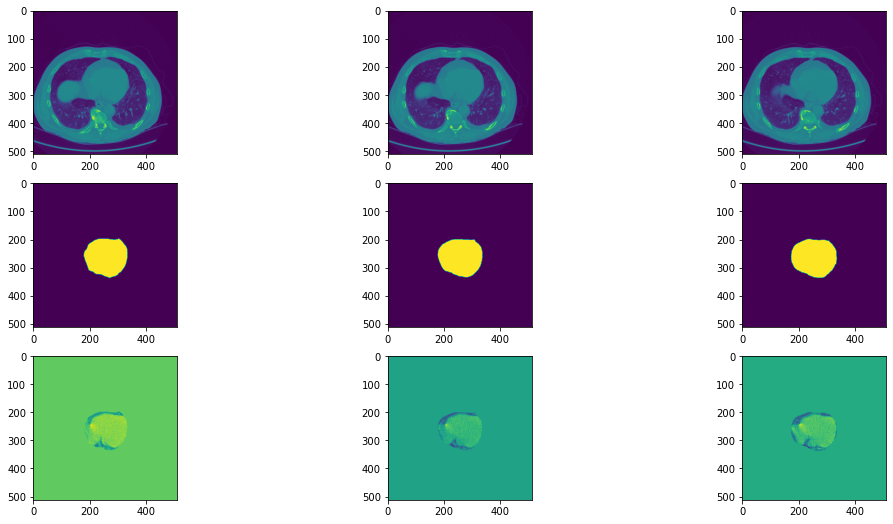

In [87]:
slice_number = 32
combined = dataset_vol_volumes[slice_number] * dataset_sac_volumes[slice_number]

plt.subplot(3, 3, 1)
plt.imshow((dataset_vol_volumes[slice_number])[:,:,0])
plt.subplot(3, 3, 2)
plt.imshow((dataset_vol_volumes[slice_number])[:,:,1])
plt.subplot(3, 3, 3)
plt.imshow((dataset_vol_volumes[slice_number])[:,:,2])

plt.subplot(3, 3, 4)
plt.imshow((dataset_sac_volumes[slice_number])[:,:,0])
plt.subplot(3, 3, 5)
plt.imshow((dataset_sac_volumes[slice_number])[:,:,1])
plt.subplot(3, 3, 6)
plt.imshow((dataset_sac_volumes[slice_number])[:,:,2])

plt.subplot(3, 3, 7)
plt.imshow(combined[:,:,0])
plt.subplot(3, 3, 8)
plt.imshow(combined[:,:,1])
plt.subplot(3, 3, 9)
plt.imshow(combined[:,:,2])
